In [2]:
EXPERIMENT_NOTEBOOK_PATH = "../reports/experiments/2019-1-31_3-22(uncomplete)/notebook.csv"

In [3]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [18]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug_type,magnitude,sample_no,mean_late_val_acc
0,0.114,2.300610,0.092,2.298126,0,-,-,1,NaN
1,0.131,2.287915,0.126,2.288309,0,-,-,1,NaN
2,0.162,2.269498,0.187,2.265500,0,-,-,1,NaN
3,0.182,2.236111,0.197,2.222181,0,-,-,1,NaN
4,0.209,2.177493,0.219,2.138166,0,-,-,1,NaN


In [16]:
# scores_df = df.drop_duplicates(["trial_no","sample_no"]).groupby("trial_no").sum()["mean_late_val_acc"].reset_index()
# scores_df["mean_late_val_acc"] /= 5
# scores_df.sort_values("mean_late_val_acc",ascending=False)

,trial_no,mean_late_val_acc
4,4,0.40184
15,15,0.39692
5,5,0.39556
12,12,0.39396
13,13,0.39216
7,7,0.39212
20,20,0.39184
1,1,0.39100
17,17,0.39036
10,10,0.38844


In [33]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure"]

def plot_exp_lines(monitor_col="val_loss"):
    
    rowList = []
    
    for exp_id in exp_df["trial_no"].unique():
        
        iter_df = exp_df[exp_df["trial_no"]==exp_id].copy()

        
        exp_color = color_palette[exp_id]
        
        if exp_df[exp_df["trial_no"]==exp_id]["magnitude"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,21,1)
            plt.plot(xs, sample_df[monitor_col], color=exp_color, alpha=0.5, linewidth=2)
            
            mean_last_scores.append(sample_df[monitor_col].tail(3).mean())
            
        plt.title(monitor_col)
            
        score = np.mean(mean_last_scores)
        param1 = iter_df["aug_type"].values[0]
        param2 = iter_df["magnitude"].values[0]
        
        rowList.append([param1,param2,score])
        
    ret_df = pd.DataFrame(rowList, columns=["aug_type","magnitude","mean_last_"+monitor_col]) 
    return ret_df.sort_values("mean_last_"+monitor_col, ascending=False)

,aug_type,magnitude,mean_last_val_acc
4,3,0.056712977317443194,0.400867
5,3,0.47766511732135,0.398200
15,7,0.009331418951692318,0.397133
12,1,0.5791635279602427,0.396200
7,5,0.8762915987832829,0.394733
13,7,0.11863057508791722,0.394200
1,5,0.8442657485810175,0.392533
17,3,0.5452317150779727,0.392533
19,7,0.2025121138976455,0.392000
10,7,0.2802448208524437,0.390733


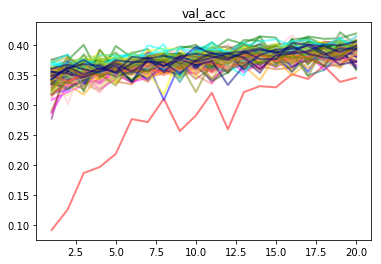

In [34]:
plot_exp_lines("val_acc")

,aug_type,magnitude,mean_last_val_loss
0,-,-,1.791389
11,7,0.542553733581784,1.723960
8,7,0.6077663562209804,1.723739
18,7,0.5769838527152508,1.718796
9,7,0.5145057243034092,1.716686
16,7,0.29464950204564194,1.715215
3,5,0.38438170729269994,1.714654
6,7,0.5451576858874873,1.714513
14,7,0.2886581352483401,1.711111
2,7,0.8472517387841256,1.711053


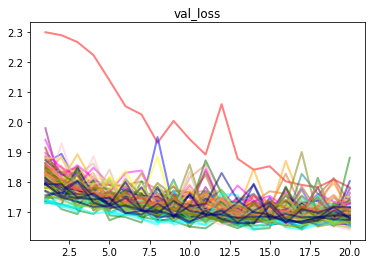

In [35]:
plot_exp_lines("val_loss")

In [39]:
exp_df[exp_df["trial_no"]==20]["sample_no"].unique()

array([1, 2, 3, 4, 5])